## Problem Statement 

### Customer Churn Analysis
Problem Statement:
Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

You will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models. 

In [1]:
import pandas  as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.shape

(7043, 21)

## Data Cleaning

In [4]:
# cheking Null Values
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


##### data does not contain  any Null values

In [6]:
# removing duplicate record

df.drop_duplicates(inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


total charges is object type 
change in float dtype

In [8]:
index = np.where(df.TotalCharges == " ")

In [9]:
index

(array([ 488,  753,  936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754],
       dtype=int64),)

In [10]:
df.TotalCharges = df["TotalCharges"].replace(" ", np.NaN)

In [11]:
df.dropna(inplace=True)

In [12]:
df["TotalCharges"] = df["TotalCharges"].astype(float)
df["SeniorCitizen"] = df["SeniorCitizen"].astype(str)

In [13]:
df.dtypes

customerID           object
gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [14]:
# droping unessasery cloumn Customer id
df.drop(columns=["customerID"],inplace=True)

In [15]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [16]:
df.shape

(7032, 20)

## EDA

In [17]:
for i in df.columns:
    if df[i].dtype == object:
        print(df[i].value_counts())
        print("**"*25)

Male      3549
Female    3483
Name: gender, dtype: int64
**************************************************
0    5890
1    1142
Name: SeniorCitizen, dtype: int64
**************************************************
No     3639
Yes    3393
Name: Partner, dtype: int64
**************************************************
No     4933
Yes    2099
Name: Dependents, dtype: int64
**************************************************
Yes    6352
No      680
Name: PhoneService, dtype: int64
**************************************************
No                  3385
Yes                 2967
No phone service     680
Name: MultipleLines, dtype: int64
**************************************************
Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64
**************************************************
No                     3497
Yes                    2015
No internet service    1520
Name: OnlineSecurity, dtype: int64
********************************************

In [18]:
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


as per above stats
1. tenure, MonthlyCharges and Totalcharges are not normally distributed.
2. std of tenure , monthalychrage,totalcharges column is high that is another indicator skewed data.

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:>

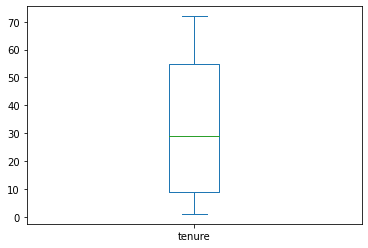

In [20]:
df.tenure.plot(kind="box")

<AxesSubplot:>

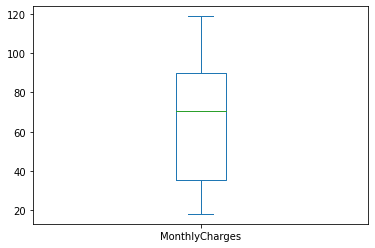

In [21]:
df.MonthlyCharges.plot(kind="box")

<AxesSubplot:>

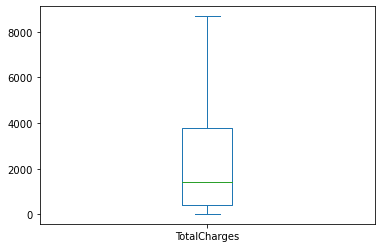

In [22]:
df.TotalCharges.plot(kind="box")

Tenure, MonthlyCharges and Totalcharges cloumn data not have outlier but it is skewd data 

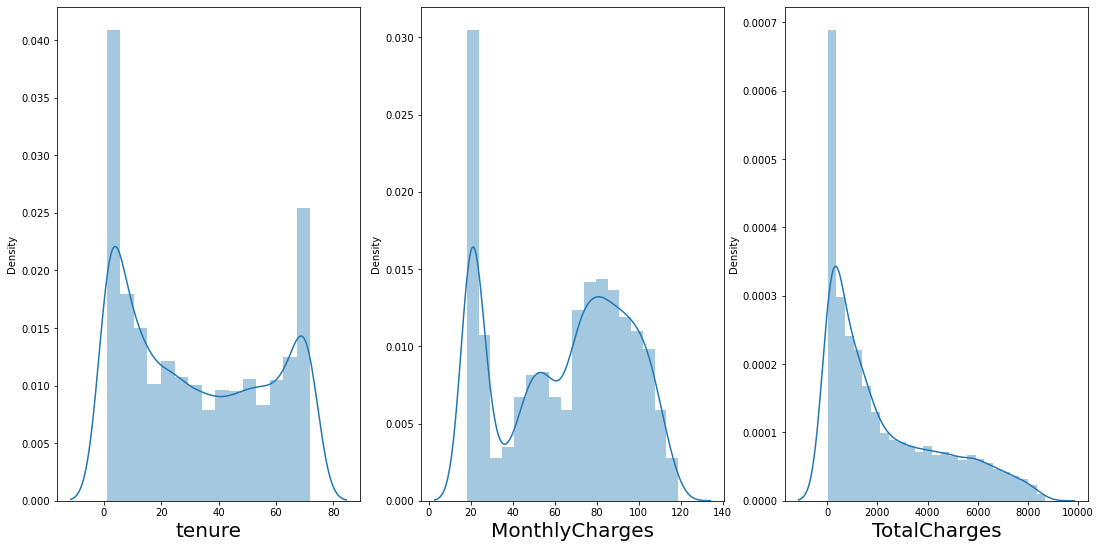

In [23]:
plt.figure(figsize=(25,20))
pltonumber = 1
for column in df[['tenure','MonthlyCharges','TotalCharges']]:
    if pltonumber<=8:
        
        ax = plt.subplot(2,4,pltonumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    pltonumber += 1
    
plt.show()

applying Log Transformation on continues data to remove skewness.

In [24]:
df["tenure"] = np.log(df["tenure"])
df["MonthlyCharges"] = np.log(df["MonthlyCharges"])
df["TotalCharges"] = np.log(df["TotalCharges"])

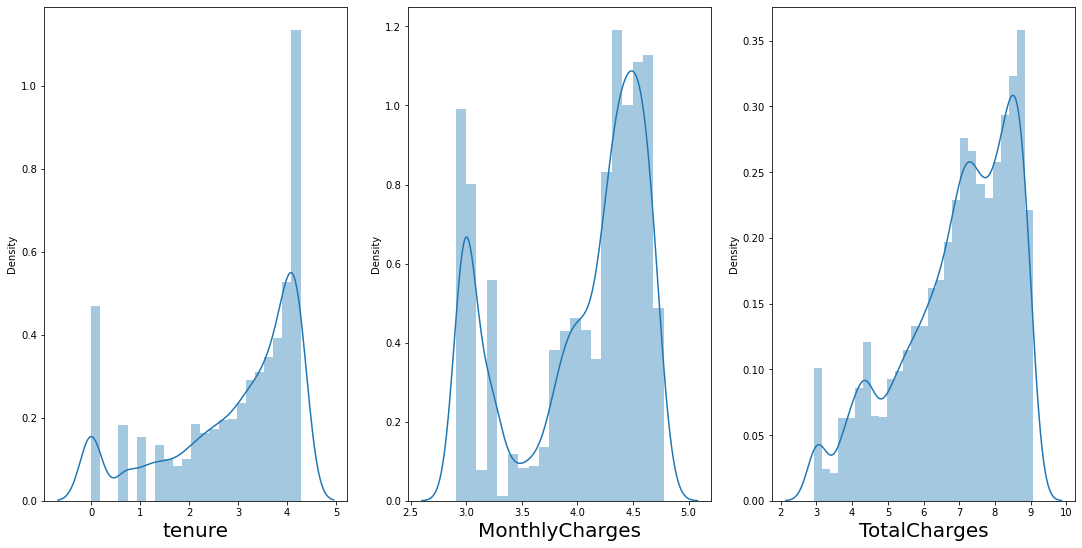

In [25]:
plt.figure(figsize=(25,20))
pltonumber = 1
for column in df[['tenure','MonthlyCharges','TotalCharges']]:
    if pltonumber<=8:
        
        ax = plt.subplot(2,4,pltonumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    pltonumber += 1
    
plt.show()

#### Power Transfer with yo-johnson

In [26]:
from sklearn.preprocessing import PowerTransformer

In [27]:
power_trans = PowerTransformer(method="yeo-johnson")

In [28]:
feature = ['tenure','MonthlyCharges','TotalCharges']
df[feature] = power_trans.fit_transform(df[feature].values)

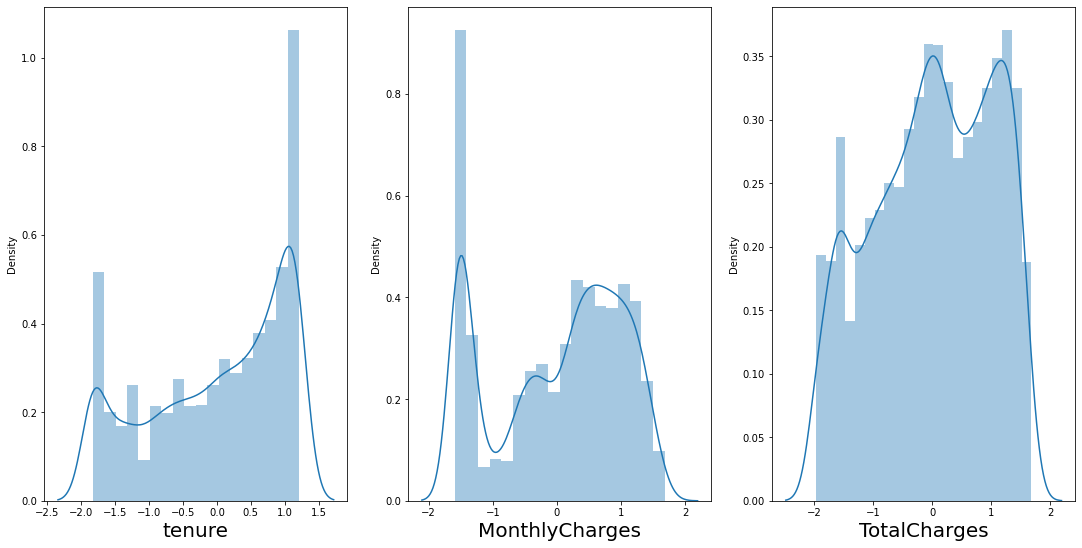

In [29]:
plt.figure(figsize=(25,20))
pltonumber = 1
for column in df[['tenure','MonthlyCharges','TotalCharges']]:
    if pltonumber<=8:
        
        ax = plt.subplot(2,4,pltonumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    pltonumber += 1
    
plt.show()

Male      3549
Female    3483
Name: gender, dtype: int64


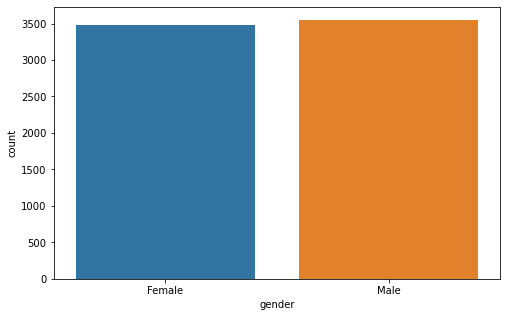

0    5890
1    1142
Name: SeniorCitizen, dtype: int64


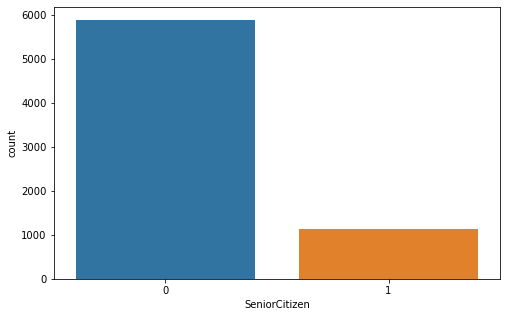

No     3639
Yes    3393
Name: Partner, dtype: int64


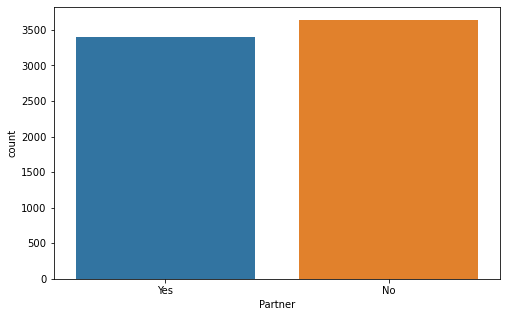

No     4933
Yes    2099
Name: Dependents, dtype: int64


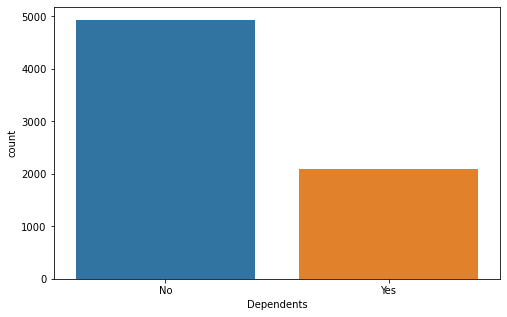

Yes    6352
No      680
Name: PhoneService, dtype: int64


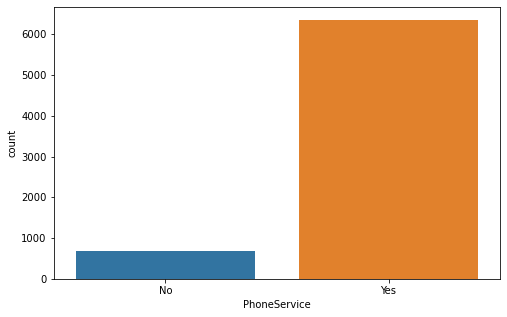

No                  3385
Yes                 2967
No phone service     680
Name: MultipleLines, dtype: int64


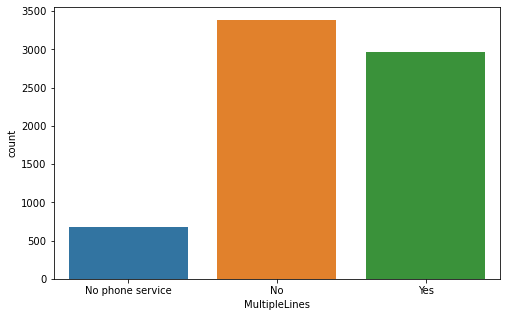

Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64


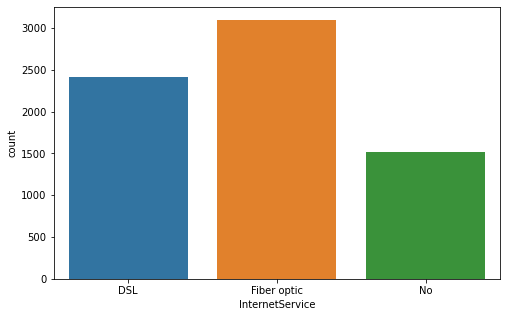

No                     3497
Yes                    2015
No internet service    1520
Name: OnlineSecurity, dtype: int64


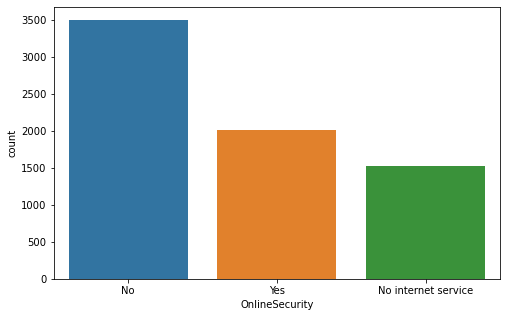

No                     3087
Yes                    2425
No internet service    1520
Name: OnlineBackup, dtype: int64


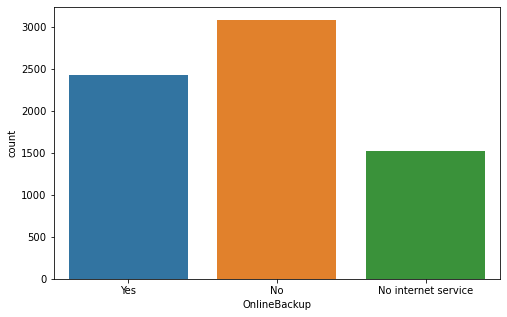

No                     3094
Yes                    2418
No internet service    1520
Name: DeviceProtection, dtype: int64


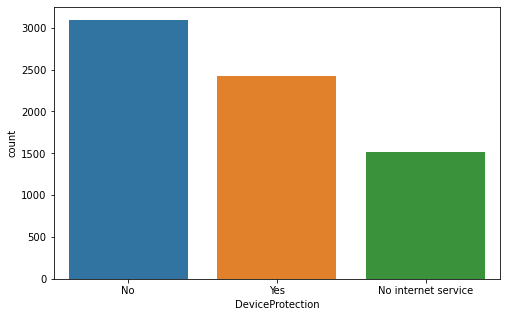

No                     3472
Yes                    2040
No internet service    1520
Name: TechSupport, dtype: int64


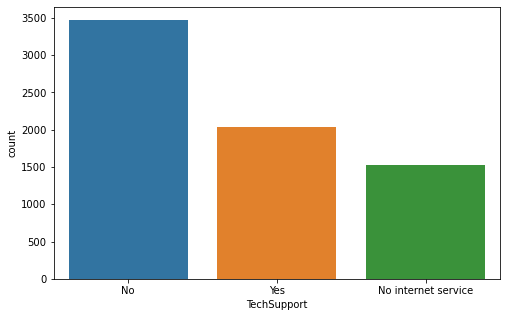

No                     2809
Yes                    2703
No internet service    1520
Name: StreamingTV, dtype: int64


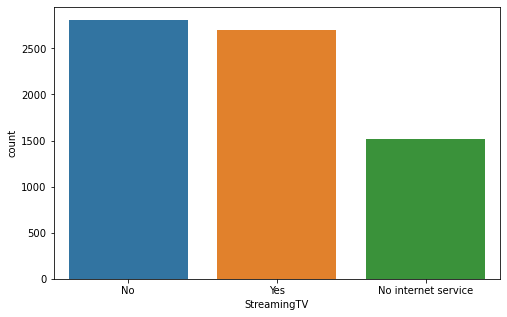

No                     2781
Yes                    2731
No internet service    1520
Name: StreamingMovies, dtype: int64


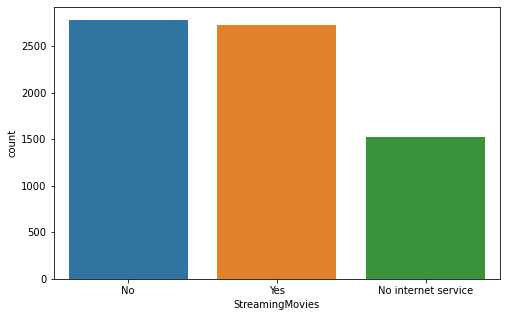

Month-to-month    3875
Two year          1685
One year          1472
Name: Contract, dtype: int64


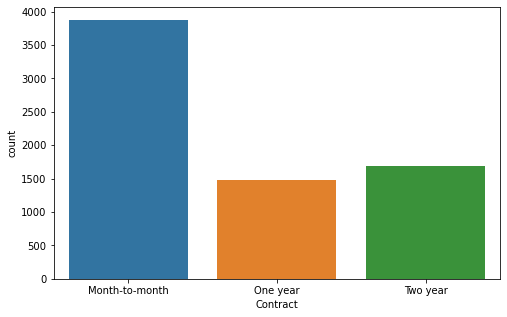

Yes    4168
No     2864
Name: PaperlessBilling, dtype: int64


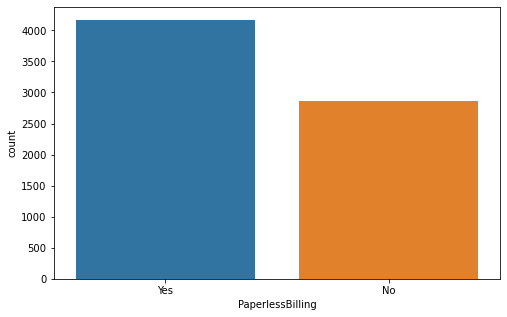

Electronic check             2365
Mailed check                 1604
Bank transfer (automatic)    1542
Credit card (automatic)      1521
Name: PaymentMethod, dtype: int64


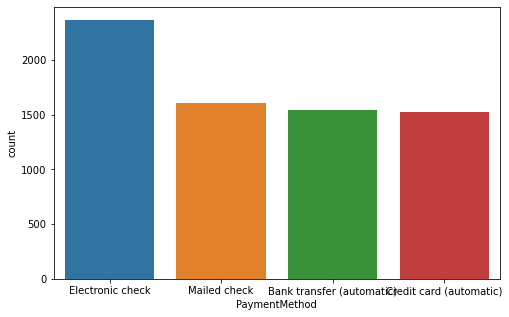

No     5163
Yes    1869
Name: Churn, dtype: int64


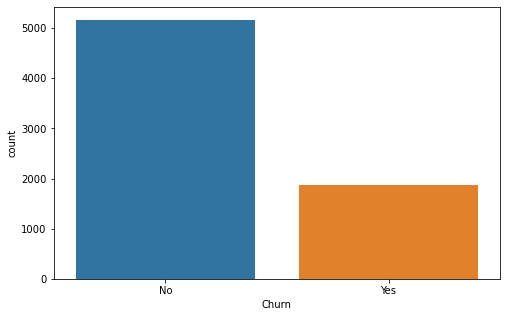

In [30]:
for i in df.columns:
    if df[i].dtype == object:
        plt.figure(figsize=(8,5))
        sns.countplot(x = i,data= df)
        print(df[i].value_counts())
        plt.show()

### Observation
1. There are very few senior citizens.
2. Most people use phone service.
3. Customers of Internet Service chose fibre optics and DSL.
4. Most of the people are concerned about online security.
5. Customers prefer more month-to-month contracts on yearly and two-year contracts. 

Text(0.5, 1.0, 'Churn')

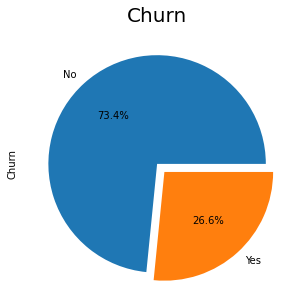

In [31]:
plt.figure(figsize=(5,5))
df["Churn"].value_counts().plot(kind='pie', explode=[0,0.1],autopct='%3.1f%%')
plt.title("Churn",fontsize = 20)

In [5]:
x = df.drop(columns=['Churn'])
y = df.Churn
x.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5


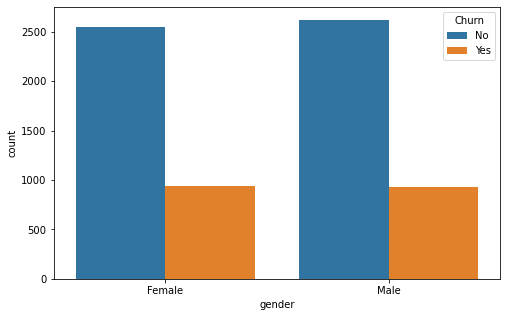

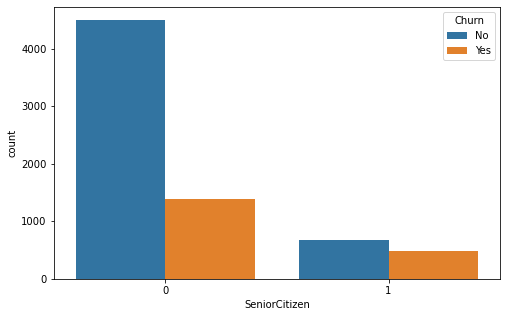

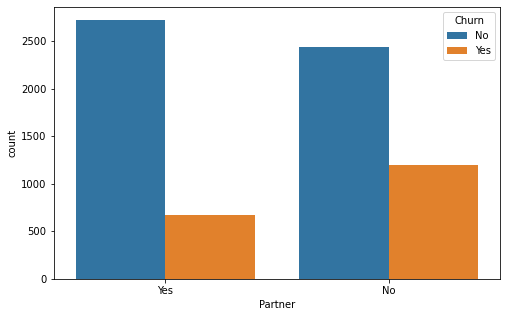

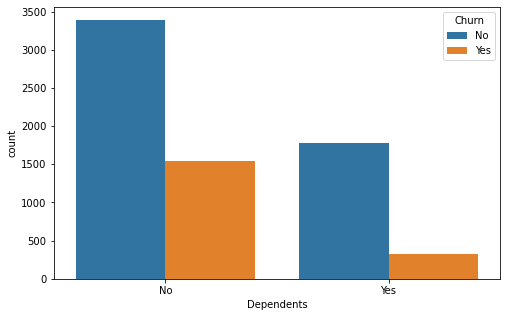

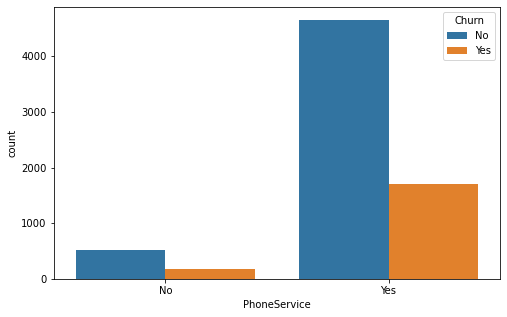

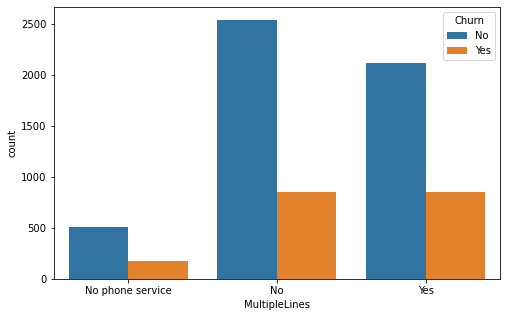

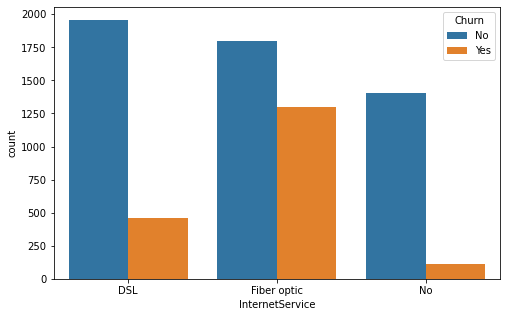

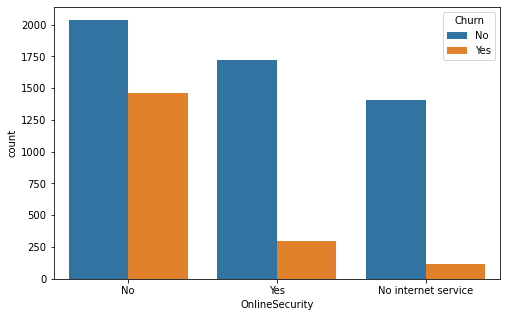

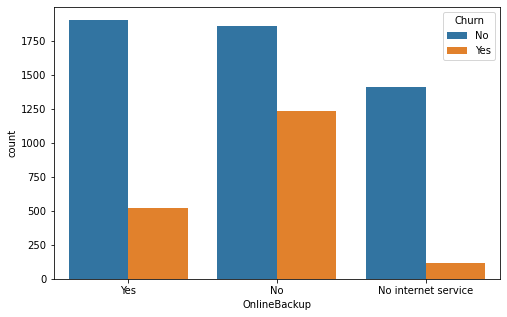

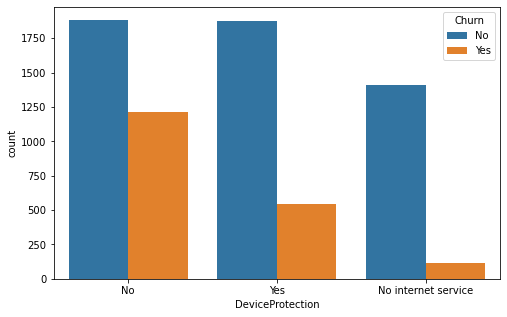

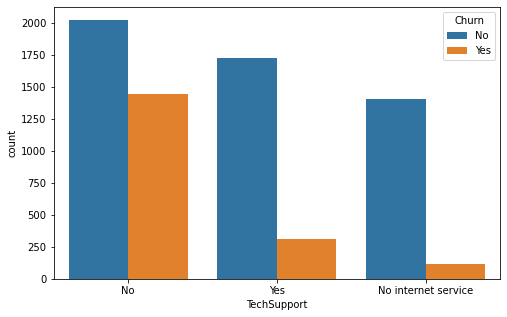

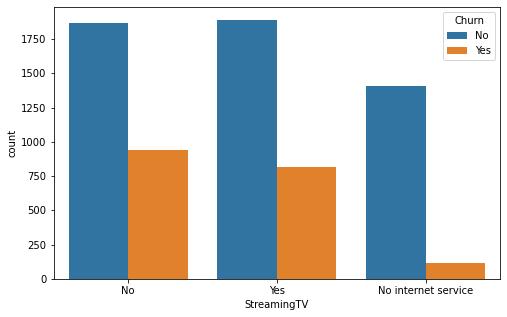

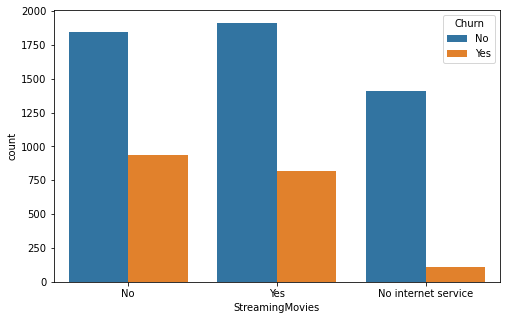

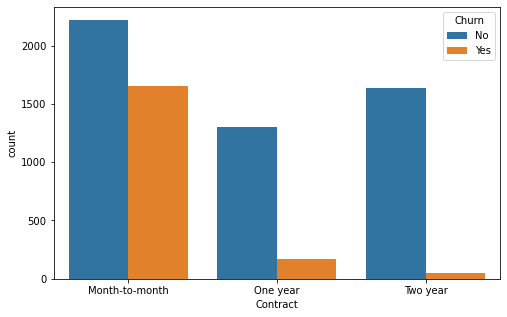

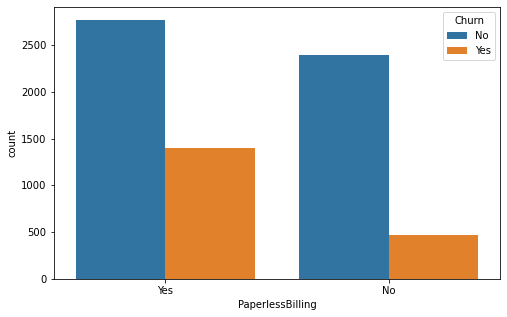

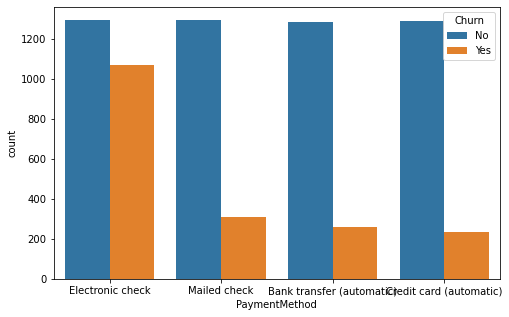

In [33]:
for i in x:
    if x[i].dtype == object:
        plt.figure(figsize=(8,5))
        sns.countplot(x = i,data= x,hue=y)
        plt.show()

### Observation
1. Most senior citizens don't renew their contracts.
2. Customers prefer fibre optics to DSL.
3. Online security is important. If you don't provide good online security, your customer churn rate will be high.
4. Customers require technical support for any problem that arises in any situation.If the telecom company fails to provide adequate technical support, they will discontinue service after the contract expires.
5. Customers who use a monthly contract change telecom service providers very frequently for better service.
6. Customers who use e-checks for payment have more chances of shifting to another telecom for a better experience.  

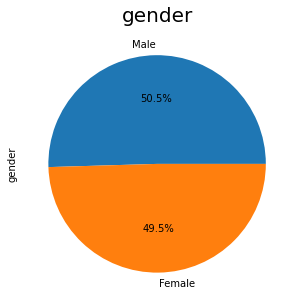

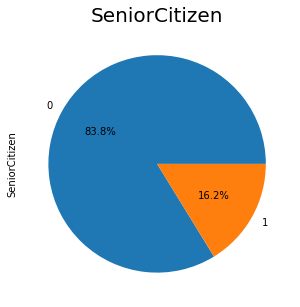

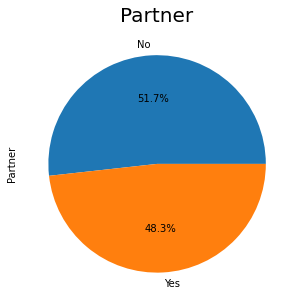

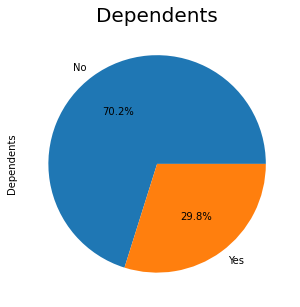

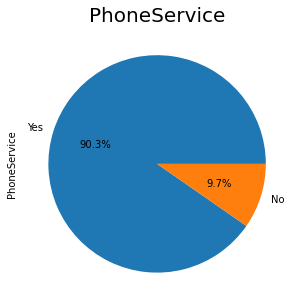

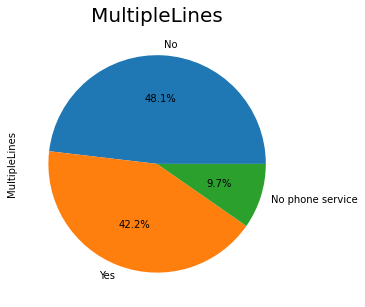

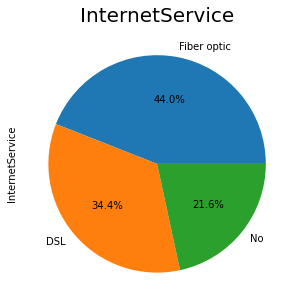

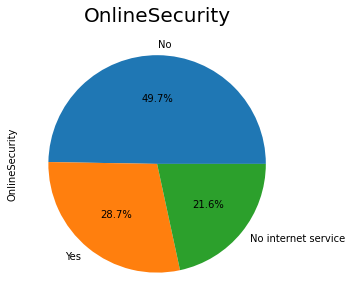

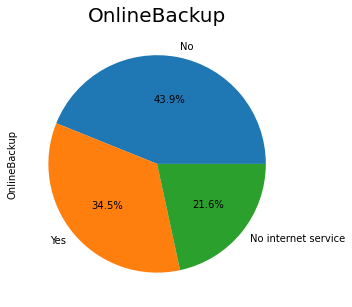

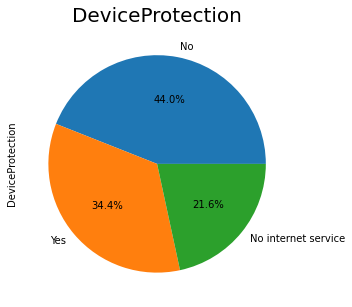

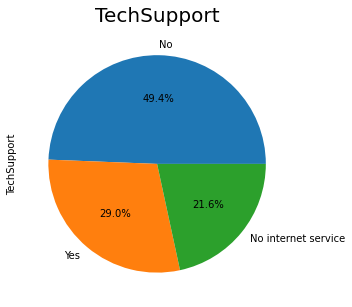

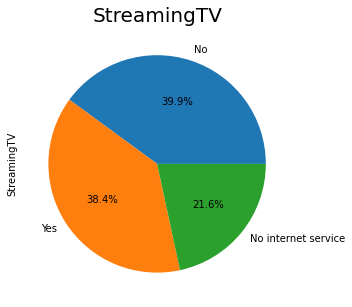

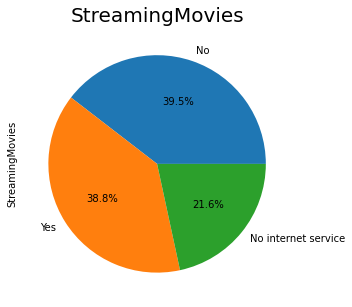

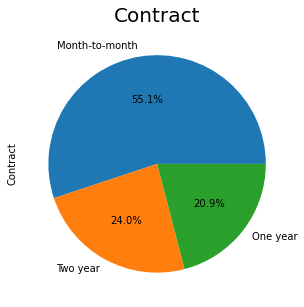

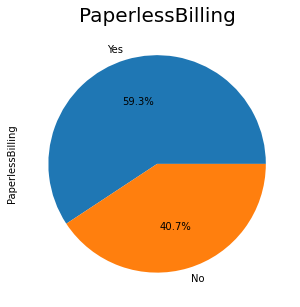

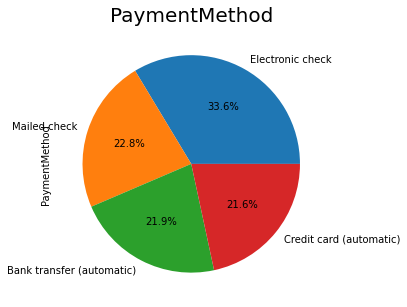

In [34]:
for i in x:
    if x[i].dtype == object:
        plt.figure(figsize=(5,5))
        x[i].value_counts().plot(kind='pie',autopct='%3.1f%%')
        plt.title(i,fontsize = 20)

### Observation
1. Only 16% of customers are senior citizens.
2. 70% of customers are independent
3. Less than 10% of customers do not have phone service.
4. More than 40% of customers use fiber-optic connections for internet service.
5. Nearly 50% of customers don't have online security services.
6. 44% don't have an online backup.
7. Only 34.4% of customers have device protection.
8. Approximately 50% of customers are not happy with tech support.
9. 5% of customers use a monthly contract for telecom service.
10. Close to 60% use paperless billing because of easy access.

### Encoding Catagorical Columns

In [35]:
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder

ordinal_enc = OrdinalEncoder()
label_enc = LabelEncoder()

In [36]:
for i in df:
    if df[i].dtype == object:
         df[i] = ordinal_enc.fit_transform(df[i].values.reshape(-1,1))

In [37]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0.0,0.0,1.0,0.0,-1.829828,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,-1.165626,-1.854026,0.0
1,1.0,0.0,0.0,0.0,0.384985,1.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,3.0,-0.212851,0.286090,0.0
2,1.0,0.0,0.0,0.0,-1.613165,1.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,-0.317543,-1.415969,1.0
3,1.0,0.0,0.0,0.0,0.678667,0.0,1.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,-0.717422,0.265390,0.0
4,0.0,0.0,0.0,0.0,-1.613165,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.238757,-1.270002,1.0


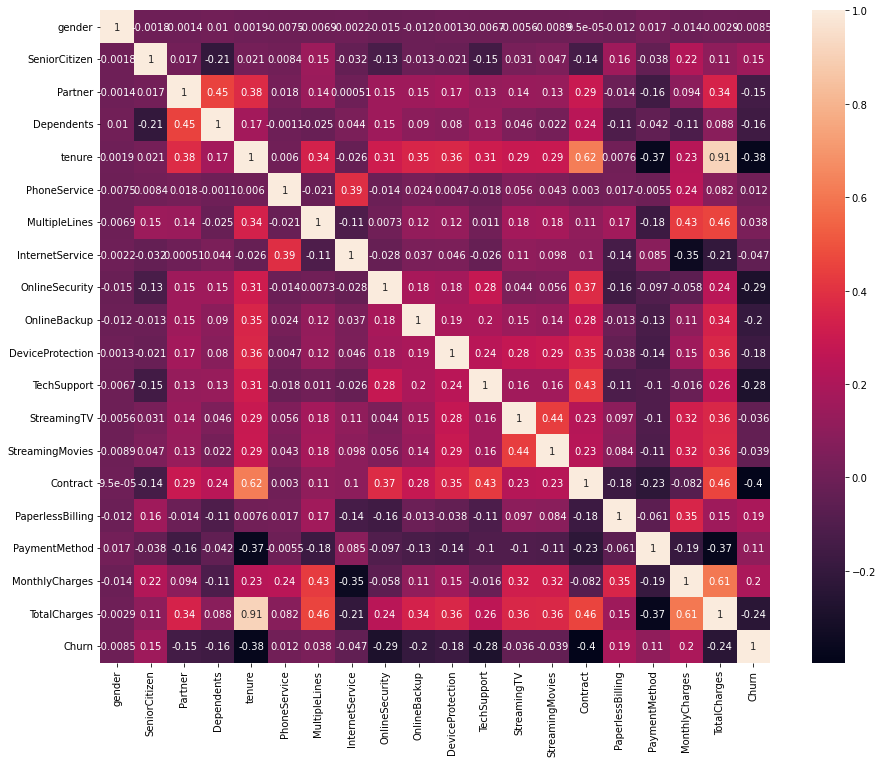

In [38]:
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(),annot=True)
plt.show()

Total charges and tenur have a strong correlation with each other as a result of the observation.

In [39]:
df.corr()["Churn"].sort_values()

Contract           -0.396150
tenure             -0.376891
OnlineSecurity     -0.289050
TechSupport        -0.282232
TotalCharges       -0.238445
OnlineBackup       -0.195290
DeviceProtection   -0.177883
Dependents         -0.163128
Partner            -0.149982
InternetService    -0.047097
StreamingMovies    -0.038802
StreamingTV        -0.036303
gender             -0.008545
PhoneService        0.011691
MultipleLines       0.038043
PaymentMethod       0.107852
SeniorCitizen       0.150541
PaperlessBilling    0.191454
MonthlyCharges      0.196895
Churn               1.000000
Name: Churn, dtype: float64

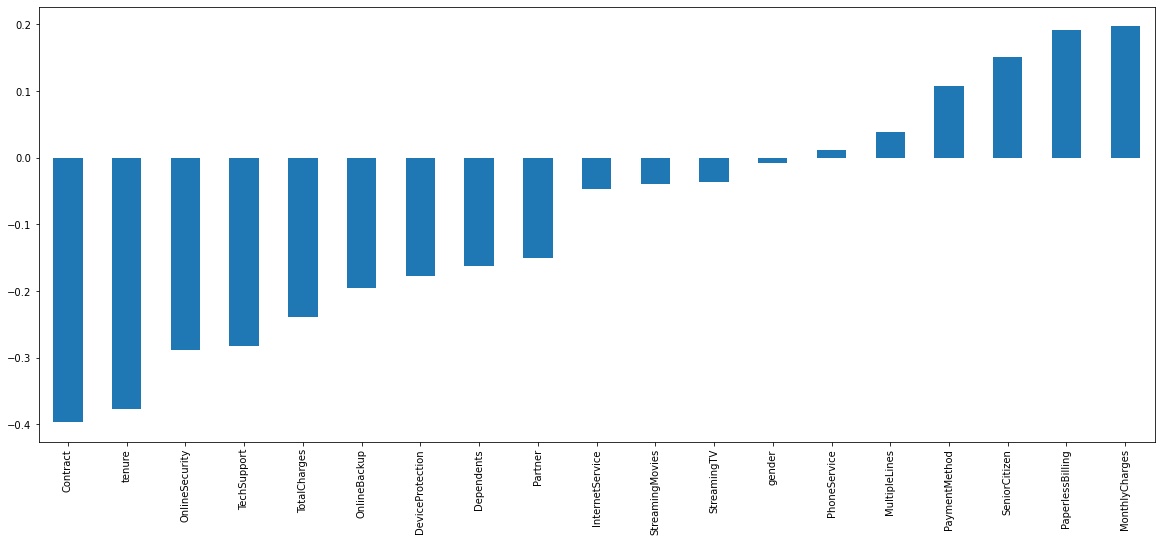

In [40]:
plt.figure(figsize=(20,8))
df.corr()["Churn"].sort_values().drop(["Churn"]).plot(kind = "bar")
plt.show()

### Observation
1. Gender and phone service have very little correlation with the target variable.
2. InternetService, StreamingMovies, StreamingTv and MultipeLines less relation with label.

In [41]:
x = df.drop(columns=["Churn"])
y = df.Churn

In [42]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 

In [43]:
from sklearn.preprocessing import StandardScaler

In [44]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [45]:
x_scaled.shape

(7032, 19)

In [46]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(x_scaled, i) for i in range(x_scaled.shape[1])]
vif["cloumns"] = x.columns

vif

,vif,cloumns
0,1.001538,gender
1,1.149519,SeniorCitizen
2,1.455566,Partner
3,1.377022,Dependents
4,80.011675,tenure
5,1.635067,PhoneService
6,1.392051,MultipleLines
7,2.174047,InternetService
8,1.261707,OnlineSecurity
9,1.188685,OnlineBackup


In [47]:
from sklearn.feature_selection import SelectKBest, f_classif

In [48]:
def best_Features(i):
        best_features = SelectKBest(score_func=f_classif, k = i)
        
        fit = best_features.fit(x_scaled,y)
        
        df_scores = pd.DataFrame(fit.scores_)
        df_column = pd.DataFrame(x.columns)
        
        features_scores = pd.concat([df_column,df_scores],axis=1)
        features_scores.columns = ["feature name","score"]
        
        print(features_scores.nlargest(i,"score"))
        

In [49]:
best_Features(13)

        feature name        score
14          Contract  1308.616162
4             tenure  1163.920305
8     OnlineSecurity   640.904068
11       TechSupport   608.441398
18      TotalCharges   423.791122
17    MonthlyCharges   283.528852
9       OnlineBackup   278.742773
15  PaperlessBilling   267.487636
10  DeviceProtection   229.715033
3         Dependents   192.188857
1      SeniorCitizen   163.012426
2            Partner   161.775966
16     PaymentMethod    82.735749


#### InternetService, StreamingMovies, Multiple Lines, StreamingTV, PhoneService, and gender have very low scores, and they have been shortlisted before because they have a lower correlation with the Trget variable.

#### Dropping the variable mentioned in the above observation

# Model Building

In [50]:
new_x = df[["Contract","tenure","OnlineSecurity","TechSupport","TotalCharges","MonthlyCharges","OnlineBackup","PaperlessBilling","DeviceProtection","Dependents","SeniorCitizen","Partner","PaymentMethod"]]

In [51]:
new_x.head()

,Contract,tenure,OnlineSecurity,TechSupport,TotalCharges,MonthlyCharges,OnlineBackup,PaperlessBilling,DeviceProtection,Dependents,SeniorCitizen,Partner,PaymentMethod
0,0.0,-1.829828,0.0,0.0,-1.854026,-1.165626,2.0,1.0,0.0,0.0,0.0,1.0,2.0
1,1.0,0.384985,2.0,0.0,0.286090,-0.212851,0.0,0.0,2.0,0.0,0.0,0.0,3.0
2,0.0,-1.613165,2.0,0.0,-1.415969,-0.317543,2.0,1.0,0.0,0.0,0.0,0.0,3.0
3,1.0,0.678667,2.0,2.0,0.265390,-0.717422,0.0,0.0,2.0,0.0,0.0,0.0,0.0
4,0.0,-1.613165,0.0,0.0,-1.270002,0.238757,0.0,1.0,0.0,0.0,0.0,0.0,2.0


In [52]:
new_x.shape

(7032, 13)

In [53]:
x_scaled = scaler.fit_transform(new_x)

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled,y,random_state=21)

In [56]:
!pip install imblearn

In [57]:
from imblearn.over_sampling import SMOTE

In [58]:
over_samp = SMOTE()

x_train,y_train=over_samp.fit_resample(x_train,y_train)

### Logistic Reg

In [59]:
from sklearn.linear_model import LogisticRegression

In [60]:
logistic_reg = LogisticRegression()

In [61]:
logistic_reg.fit(x_train,y_train)

LogisticRegression()

In [62]:
from sklearn.metrics import classification_report,accuracy_score

In [63]:
ytrain_pred = logistic_reg.predict(x_train)
accuracy_score(y_train,ytrain_pred)

0.7739497950819673

In [64]:
ytest_pred = logistic_reg.predict(x_test)
accuracy_score(y_test,ytest_pred)

0.7571103526734926

In [65]:
print(classification_report(y_test,ytest_pred,digits=2))

              precision    recall  f1-score   support

         0.0       0.90      0.75      0.82      1259
         1.0       0.55      0.78      0.65       499

    accuracy                           0.76      1758
   macro avg       0.72      0.76      0.73      1758
weighted avg       0.80      0.76      0.77      1758



In [66]:
def mtric_score(model,xtrain,xtest,ytrain,ytest, test=True):
    if test==False:
        train_pred = model.predict(xtrain)
        print("Train Result")
        print("accuracy score: ",accuracy_score(ytrain,train_pred))
        
    elif test == True:
        test_pred = model.predict(xtest)
        print("test result")
        print("accuracy score: ", accuracy_score(ytest,test_pred))
        
        print("Classification report")
        print(classification_report(ytest,test_pred,digits=2))

In [67]:
from sklearn.model_selection import GridSearchCV

In [68]:
parameters = {'max_iter':[10,20,30,40,50],
             'C':[0.1,0.2,1.0]}

In [69]:
grid_logistic = GridSearchCV(estimator=logistic_reg,param_grid=parameters)

In [70]:
grid_logistic.fit(x_train,y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.1, 0.2, 1.0],
                         'max_iter': [10, 20, 30, 40, 50]})

In [71]:
grid_logistic.estimator.get_params().keys()

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])

In [72]:
grid_logistic.best_params_

{'C': 0.1, 'max_iter': 20}

In [73]:
logistic_reg = LogisticRegression(max_iter=20,C=0.1)

In [74]:
logistic_reg.fit(x_train,y_train)

LogisticRegression(C=0.1, max_iter=20)

In [75]:
mtric_score(logistic_reg,x_train,x_test,y_train,y_test,test=False)

Train Result
accuracy score:  0.7731813524590164


In [76]:
mtric_score(logistic_reg,x_train,x_test,y_train,y_test,test=True)

test result
accuracy score:  0.7559726962457338
Classification report
              precision    recall  f1-score   support

         0.0       0.90      0.75      0.81      1259
         1.0       0.55      0.78      0.64       499

    accuracy                           0.76      1758
   macro avg       0.72      0.76      0.73      1758
weighted avg       0.80      0.76      0.77      1758



### KNN

In [77]:
from sklearn.neighbors import KNeighborsClassifier

In [78]:
KNN = KNeighborsClassifier()

In [79]:
KNN.fit(x_train,y_train)

KNeighborsClassifier()

In [80]:
mtric_score(KNN,x_train,x_test,y_train,y_test,test=False)

Train Result
accuracy score:  0.8652663934426229


In [81]:
mtric_score(KNN,x_train,x_test,y_train,y_test,test=True)

test result
accuracy score:  0.7184300341296929
Classification report
              precision    recall  f1-score   support

         0.0       0.85      0.74      0.79      1259
         1.0       0.50      0.67      0.58       499

    accuracy                           0.72      1758
   macro avg       0.68      0.70      0.68      1758
weighted avg       0.75      0.72      0.73      1758



In [82]:
parameters= {'n_neighbors':[1,2,3,4,5,6,7],
            'weights':['uniform', 'distance'],
            'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
            'leaf_size':[10,12,15,17,20,22,25,30]}

In [83]:
grid_knn = GridSearchCV(estimator=KNN,param_grid=parameters)

In [84]:
grid_knn.fit(x_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [10, 12, 15, 17, 20, 22, 25, 30],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7],
                         'weights': ['uniform', 'distance']})

In [85]:
grid_knn.best_params_

{'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 1, 'weights': 'uniform'}

In [90]:
knn = KNeighborsClassifier(algorithm='auto',leaf_size=10,n_neighbors=1,weights='uniform')

In [91]:
knn.fit(x_train,y_train)

KNeighborsClassifier(leaf_size=10, n_neighbors=1)

In [92]:
mtric_score(knn,x_train,x_test,y_train,y_test,test=False)

Train Result
accuracy score:  0.9970543032786885


In [93]:
mtric_score(knn,x_train,x_test,y_train,y_test,test=True)

test result
accuracy score:  0.7241183162684869
Classification report
              precision    recall  f1-score   support

         0.0       0.80      0.81      0.81      1259
         1.0       0.51      0.50      0.51       499

    accuracy                           0.72      1758
   macro avg       0.66      0.66      0.66      1758
weighted avg       0.72      0.72      0.72      1758



### Decision Tree

In [94]:
from sklearn.tree import DecisionTreeClassifier

In [95]:
dt_model = DecisionTreeClassifier()

In [96]:
dt_model.fit(x_train,y_train)

DecisionTreeClassifier()

In [97]:
mtric_score(dt_model,x_train,x_test,y_train,y_test,test=False)

Train Result
accuracy score:  0.9982069672131147


In [98]:
mtric_score(dt_model,x_train,x_test,y_train,y_test,test=True)

test result
accuracy score:  0.714448236632537
Classification report
              precision    recall  f1-score   support

         0.0       0.82      0.78      0.80      1259
         1.0       0.50      0.56      0.53       499

    accuracy                           0.71      1758
   macro avg       0.66      0.67      0.66      1758
weighted avg       0.73      0.71      0.72      1758



In [121]:
parameters = {'criterion':["gini", "entropy"],
             'min_samples_split':[2,3,4,5,6,7,8],
             'min_samples_leaf':[1,2,3,4,5,6],
             'splitter':["best", "random"],
             'max_depth':range(5,20)}

In [122]:
grid_dt = GridSearchCV(estimator=dt_model,param_grid=parameters)

In [123]:
grid_dt.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(criterion='entropy',
                                              min_samples_leaf=6,
                                              min_samples_split=4,
                                              splitter='random'),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(5, 20),
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8],
                         'splitter': ['best', 'random']})

In [124]:
grid_dt.best_params_

{'criterion': 'entropy',
 'max_depth': 13,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'splitter': 'random'}

In [125]:
dt_model = DecisionTreeClassifier(criterion='entropy',min_samples_leaf=1,min_samples_split=4,splitter='random',max_depth=13)

In [126]:
dt_model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=13, min_samples_split=4,
                       splitter='random')

In [127]:
mtric_score(dt_model,x_train,x_test,y_train,y_test,test=False)

Train Result
accuracy score:  0.8582223360655737


In [128]:
mtric_score(dt_model,x_train,x_test,y_train,y_test,test=True)

test result
accuracy score:  0.754835039817975
Classification report
              precision    recall  f1-score   support

         0.0       0.86      0.78      0.82      1259
         1.0       0.55      0.69      0.61       499

    accuracy                           0.75      1758
   macro avg       0.71      0.74      0.72      1758
weighted avg       0.78      0.75      0.76      1758



### Random Forest

In [129]:
from sklearn.ensemble import RandomForestClassifier

In [130]:
random_forest = RandomForestClassifier()

In [131]:
random_forest.fit(x_train,y_train)

RandomForestClassifier()

In [132]:
mtric_score(random_forest,x_train,x_test,y_train,y_test,test=False)

Train Result
accuracy score:  0.9982069672131147


In [133]:
mtric_score(random_forest,x_train,x_test,y_train,y_test,test=True)

test result
accuracy score:  0.7787258248009101
Classification report
              precision    recall  f1-score   support

         0.0       0.85      0.84      0.84      1259
         1.0       0.61      0.62      0.61       499

    accuracy                           0.78      1758
   macro avg       0.73      0.73      0.73      1758
weighted avg       0.78      0.78      0.78      1758



In [143]:
parameters = {'n_estimators':range(10,15),
             'criterion':["gini", "entropy"],
             'max_depth':range(10,17),
             'min_samples_split':range(2,9),
             'min_samples_leaf':range(1,8)}

In [144]:
grid_random_forest = GridSearchCV(estimator=random_forest,param_grid=parameters)

In [145]:
grid_random_forest.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(10, 17),
                         'min_samples_leaf': range(1, 8),
                         'min_samples_split': range(2, 9),
                         'n_estimators': range(10, 15)})

In [146]:
grid_random_forest.best_params_

{'criterion': 'entropy',
 'max_depth': 16,
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 14}

In [147]:
random_forest = RandomForestClassifier(criterion='entropy',max_depth=16,min_samples_leaf=1,min_samples_split=3,n_estimators=14)

In [148]:
random_forest.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=16, min_samples_split=3,
                       n_estimators=14)

In [149]:
mtric_score(random_forest,x_train,x_test,y_train,y_test,test=False)

Train Result
accuracy score:  0.9606813524590164


In [150]:
mtric_score(random_forest,x_train,x_test,y_train,y_test,test=True)

test result
accuracy score:  0.7781569965870307
Classification report
              precision    recall  f1-score   support

         0.0       0.86      0.83      0.84      1259
         1.0       0.60      0.66      0.63       499

    accuracy                           0.78      1758
   macro avg       0.73      0.74      0.73      1758
weighted avg       0.79      0.78      0.78      1758



### SVM

In [154]:
from sklearn.svm import SVC

In [164]:
SVM = SVC()

In [165]:
SVM.fit(x_train,y_train)

SVC()

In [166]:
mtric_score(SVM,x_train,x_test,y_train,y_test,test=False)

Train Result
accuracy score:  0.8094262295081968


In [167]:
mtric_score(SVM,x_train,x_test,y_train,y_test,test=True)

test result
accuracy score:  0.7599544937428896
Classification report
              precision    recall  f1-score   support

         0.0       0.89      0.76      0.82      1259
         1.0       0.56      0.76      0.64       499

    accuracy                           0.76      1758
   macro avg       0.72      0.76      0.73      1758
weighted avg       0.79      0.76      0.77      1758



In [161]:
parameters = {'C':[1,2,3,4,5],
             'gamma':[0.001,0.01,0.1,0.002,0.02,0.2]}

In [168]:
grid_svm = GridSearchCV(estimator=SVM,param_grid=parameters)

In [169]:
grid_svm.fit(x_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 2, 3, 4, 5],
                         'gamma': [0.001, 0.01, 0.1, 0.002, 0.02, 0.2]})

In [170]:
grid_svm.best_params_

{'C': 5, 'gamma': 0.2}

In [171]:
SVM = SVC(C=5,gamma=0.2)

In [173]:
SVM.fit(x_train,y_train)

SVC(C=5, gamma=0.2)

In [174]:
mtric_score(SVM,x_train,x_test,y_train,y_test,test=False)

Train Result
accuracy score:  0.8889600409836066


In [175]:
mtric_score(SVM,x_train,x_test,y_train,y_test,test=True)

test result
accuracy score:  0.7434584755403868
Classification report
              precision    recall  f1-score   support

         0.0       0.86      0.77      0.81      1259
         1.0       0.54      0.68      0.60       499

    accuracy                           0.74      1758
   macro avg       0.70      0.72      0.71      1758
weighted avg       0.77      0.74      0.75      1758



### ROC curve

In [176]:
from sklearn.metrics import roc_auc_score,roc_curve,plot_roc_curve

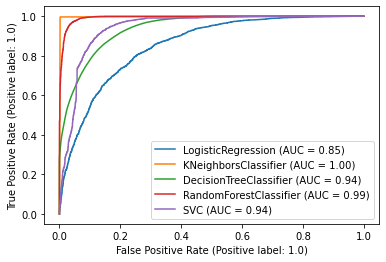

In [177]:
chart = plot_roc_curve(logistic_reg,x_train,y_train)

plot_roc_curve(knn,x_train,y_train,ax=chart.ax_)
plot_roc_curve(dt_model,x_train,y_train,ax=chart.ax_)
plot_roc_curve(random_forest,x_train,y_train,ax=chart.ax_)
plot_roc_curve(SVM,x_train,y_train,ax=chart.ax_)

plt.legend(prop={'size':10},loc='lower right')
plt.show()

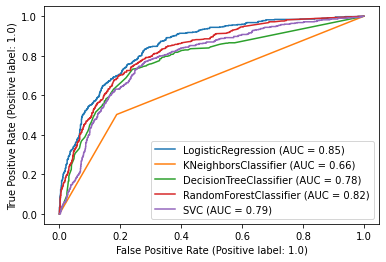

In [178]:
chart = plot_roc_curve(logistic_reg,x_test,y_test)

plot_roc_curve(knn,x_test,y_test,ax=chart.ax_)
plot_roc_curve(dt_model,x_test,y_test,ax=chart.ax_)
plot_roc_curve(random_forest,x_test,y_test,ax=chart.ax_)
plot_roc_curve(SVM,x_test,y_test,ax=chart.ax_)

plt.legend(prop={'size':10},loc='lower right')
plt.show()